<a href="https://colab.research.google.com/github/AnIsAsPe/Estadistica_y_Probabilidad_para-CD-/blob/main/PrincipiosDeProbabilidad/Semana1/Notebooks/Espacio_de_Probabilidad_y_probabilidad_condicional_en_textos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instalar y cargar librerias

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

import random
import operator
import re # módulo operaciones expresiones regulares
from collections import Counter

import matplotlib.pyplot as plt

## Definición de funciones

In [3]:
def leer_libro(archivo_txt):
  '''funcion para leer un archivo en formato txt'''
  with open(archivo_txt, "r", encoding="utf8") as f:
    texto = f.read()
    texto = texto.replace("\n", "").replace("\r", "")
  return texto

In [4]:
def borrar_elementos(texto, lista):
  '''Función para eliminar en un texto los elementos contenidos en una lista,
  por ejemplo:   autor, titulo y otros elementos'''

  for elemento in lista:
    texto = texto.replace(elemento, "")
  return texto

In [5]:

def limpiar_texto(texto):
  '''Función para convertir a minúsculas, quitar signos de puntuación,
  números y tildes'''

  #Convertir en mínusculas
  texto = texto.lower()

  #Quitar tildes

  a,b = 'áéíóúü','aeiouu'
  trans = str.maketrans( a,b)
  texto = texto.translate(trans)


  #Quitar puntuación y números
  texto = re.sub('[^ña-z]+', ' ', texto)

  return texto

In [6]:
def obtener_frecuencias(lista):
  '''Devuelve diccionario con las frecuencias de los elementos de una lista
   o cadena de texto'''
  frecuencias_dict = {}
  for c in lista:
    if c in frecuencias_dict:
      frecuencias_dict[c] += 1
    else:
      frecuencias_dict[c] = 1
  #ordenar el diccionario de frecuencias
  return Counter(frecuencias_dict)

#### genera_texto_nletras()


In [7]:

def genera_texto_nletras(texto, n=1, tot_letras = 100):
  '''Devuelve un texto, utilizando ngramas a partir de letras
  n es la cantidad de letras que se toman en consideración para
  generar la siguiente'''

  # Diccionario que guarda para cada ngrama se guardara las letras que siguen al ngrama
  ngramas = {}
  for i in range(len(texto) - n):
    ng = texto[i:i+n]
    if ng not in ngramas.keys():
      ngramas[ng] = []
    ngramas[ng].append(texto[i+n])

  # Generación del texto
  ngrama = np.random.choice(list(ngramas.keys())) # primer ngrama al azar
  nuevo_texto = ngrama
  for i in range(tot_letras):
    if ngrama not in ngramas.keys():
      break
    siguiente_letra = np.random.choice(ngramas[ngrama]) # escoge de la lista de letras que le siguen al ngrama
    nuevo_texto += siguiente_letra
    ngrama = nuevo_texto[len(nuevo_texto)-n:len(nuevo_texto)]
  return nuevo_texto

In [28]:
n = 3
texto = 'regresa todos los n gramas'
for i in range(len(texto) - n):
    ng = texto[i:i+n]
    print(ng)

reg
egr
gre
res
esa
sa 
a t
 to
tod
odo
dos
os 
s l
 lo
los
os 
s n
 n 
n g
 gr
gra
ram
ama


#### genera_texto_npalabras()


In [9]:
def genera_texto_npalabras(lista_palabras, n=1, tot_palabras = 100):
  '''Devuelve un texto, utilizando ngramas de palabras

  n es la cantidad de palabras que se toman en consideración para
  generar la siguiente'''

  ngramas = {}
  for i in range(len(lista_palabras) - n):
    ng = ' '.join(lista_palabras[i:i+n])
    if ng not in ngramas.keys():
      ngramas[ng] = []
    ngramas[ng].append(lista_palabras[i+n])

  ngrama = np.random.choice(list(ngramas.keys()))
  nuevo_texto = ngrama

  for i in range(tot_palabras):
    if ngrama not in ngramas.keys():
      break
    siguiente_palabra = np.random.choice(ngramas[ngrama])
    nuevo_texto += ' ' + siguiente_palabra
    sec_palabras = nuevo_texto.split()
    ngrama = ' '.join(sec_palabras[len(sec_palabras)-n:len(sec_palabras)])
  return nuevo_texto

## Leer y prepocesar texto

In [10]:
libro = leer_libro('/content/drive/MyDrive/Datos/gabriel_garcia_marquez_cien_annos_soledad.txt')
libro[:400]

'Gabriel García Márquez Cien años de soledad EDITADO POR "EDICIONES LA CUEVA" Para J omi García Ascot y María Luisa Elio Cien años de soledad Gabriel García Márquez Muchos años después, frente al pelotón de fusilamiento, el coronel Aureliano Buendía había de recordar aquella tarde remota en que su padre lo llevó a conocer el hielo. Macondo era entonces una aldea de veinte casas de barro y cañabrava'

**Borrar nombre del autor y título del libro porque se repite muchas veces en el archivo**

In [11]:
borrar = ['Gabriel García Márquez',
          'Cien años de soledad',
          'EDITADO POR "EDICIONES LA CUEVA"',
          'Para J omi García Ascot y María Luisa Elio']

libro =  borrar_elementos(libro, borrar)

**Convertir todas las letras a minúsculas, quitar signos de puntuación, quitar números y tildes**

In [12]:
libro_limpio = limpiar_texto(libro)

In [13]:
libro_limpio

' muchos años despues frente al peloton de fusilamiento el coronel aureliano buendia habia de recordar aquella tarde remota en que su padre lo llevo a conocer el hielo macondo era entonces una aldea de veinte casas de barro y cañabrava construidas a la orilla de un rio de aguas diafanas que se precipitaban por un lecho de piedras pulidas blancas y enormes como huevos prehistoricos el mundo era tan reciente que muchas cosas carecian de nombre y para mencionarlas habia que señalarias con el dedo todos los años por el mes de marzo una familia de gitanos desarrapados plantaba su carpa cerca de la aldea y con un grande alboroto de pitos y timbales daban a conocer los nuevos inventos primero llevaron el iman un gitano corpulento de barba montaraz y manos de gorrion que se presento con el nombre de melquiades hizo una truculenta demostracion publica de lo que el mismo llamaba la octava maravilla de los sabios alquimistas de macedonia fue de casa en casa arrastrando dos lingotes metalicos y to

# Distribución de probabilidad de caracteres en 100 años de soledad

**Obtener diccionario con la frecuencia de ocurrencia de cada letra**

In [14]:
frec_caracteres = obtener_frecuencias(libro_limpio)
print('Letras unicas: ', len(frec_caracteres))
print('Total de letras en el libro', len(libro_limpio))
print('\nDiccionario con las frecuencia de ocurrencia ',
      'de cada letra en el libro')
frec_caracteres

Letras unicas:  28
Total de letras en el libro 790050

Diccionario con las frecuencia de ocurrencia  de cada letra en el libro


Counter({' ': 137910,
         'm': 16998,
         'u': 29390,
         'c': 26579,
         'h': 5706,
         'o': 61997,
         's': 45985,
         'a': 88371,
         'ñ': 1163,
         'd': 34108,
         'e': 82390,
         'p': 16547,
         'f': 4077,
         'r': 44875,
         'n': 45758,
         't': 25090,
         'l': 39053,
         'i': 41332,
         'b': 11365,
         'q': 6770,
         'v': 6878,
         'y': 5094,
         'g': 6339,
         'z': 2536,
         'j': 3028,
         'x': 662,
         'k': 23,
         'w': 26})

In [15]:
# Guardamos en una lista los caracteres unicos
caracteres = sorted(list(frec_caracteres.keys()))

**Graficar espacio de probabilidad de cada letra**

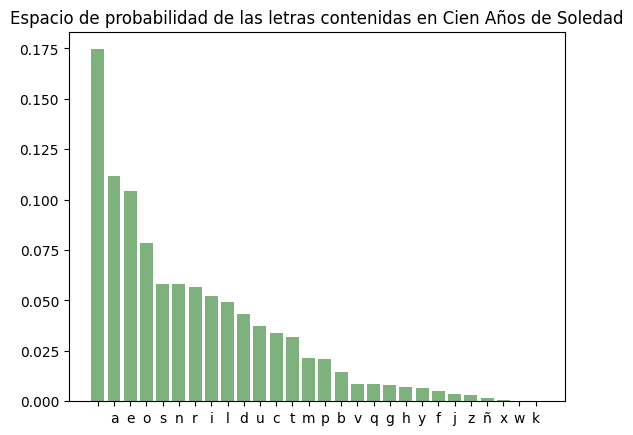

In [16]:
frec_relativa_dict = {k : v /len(libro_limpio) for k, v in frec_caracteres.items()}

#Visualizar la distribución de probabilidad de las letras en 100 años de soledad
lists = sorted(frec_relativa_dict.items(),
               key=operator.itemgetter(1),
               reverse=True)
x, y = zip(*lists)

plt.bar(x,y, color='darkgreen', alpha=0.5)
plt.title('Espacio de probabilidad de las letras contenidas en Cien Años de Soledad')
plt.show()

In [17]:
#Sumamos la probabilidad de cada palabra
round(sum(list(y)),2)

1.0

In [ ]:
#guardar en archivo csv probabilidad de ocurrencia de cada letra
Ley_Probabilidad_letras = pd.DataFrame({'caracter':frec_relativa_dict.keys(),
                                        'probabilidad':frec_relativa_dict.values()})
Ley_Probabilidad_letras=Ley_Probabilidad_letras.sort_values('caracter')
Ley_Probabilidad_letras.to_csv('Ley_Probabilidad_caracteres_100años.csv',
                               index=False)


## Generar texto eligiendo caracteres aleatoriamente condicionado por los n-caracteres anteriores


- ORDEN 0. **Distribución uniforme de los caracteres**

In [32]:
"".join(np.random.choice(caracteres,200))  #utilizamos np.random.choice para hacer muestreo con reemplazo

'esavipgwk m mdwñxfñrsi sbydsesx xtykspivwxbohatycqzswysvraenrjarccoppdhtpnhftpazngexrhmhomtcul wkkrwrve mskzmjlxamnrdgwleihlcoihxejckdbibxecfmarzeweyigfhvlskaxibnrotmhxepvmbrysxllmfrgowirrnmbhemygqch '

- ORDEN 1. **Distribución de caracteres en el libro en 100 años de Soledad**

In [33]:
 "".join(random.sample(libro_limpio, 200))


'etse oosaeiaoctethdoeede o lda  mazctdiq dinsairnued ee nrprtsmut  ioaoa uniae iaigla t   lons frteo oacenusqaaeea lud  ameihaobrs saoal nr aursrtiau cacsost rm  prcrd   u a uacapa ersnaonaapc eeanays'

- ORDEN 2. **Distribución de caracteres condicionados con un caracter anterior**


In [37]:
genera_texto_nletras(libro_limpio, 1, 200)

'el lla caza l se e stors tel e de ecomban fe ensuba ma sitos scime extere densto quspego epr as deto ude fueasusel e de a atacon telon jo ros esas qunci e tartonualaleña la larpa alala a erin qun hiden'

- ORDEN 3

In [35]:
genera_texto_nletras(libro_limpio, 2, 200)


'x to se peza humbia ah cio an a y a y vertinecio semardir quer acen unfela parsusco de remo ena memesa pacaursufre el paros engo la ferro y retra esperveheraza pora y no solia sernes y untada de desluen'

- ORDEN 4

In [36]:
genera_texto_nletras(libro_limpio,3, 200)

'iuda quidas y bierte duro con cuando en maque desola impeza de a hubia oporque habiar mas urso se el tiempleta tiera en cuerimergan aleo comprena y puntoncian igua y por un todo y una tranterir rolla par'

- ORDEN 5

In [ ]:
genera_texto_nletras(libro_limpio,4, 200)

'vaportal nombrar igualdres midio la licios mas tan pasaba vistorso mas onces se en el de librantes de todas como un gruesas madre aurelian en el para porqueria y mana emocio la fundio sufria por los no en'

# Distribución de probabilidad de palabras en 100 años de soledad

**Obtener diccionario con la frecuencia de ocurrencia de cada letra**

In [19]:
frec_palabras = obtener_frecuencias(libro_limpio.split())
print('Palabras unicas: ', len(frec_palabras))
print('Total de palabras en el libro', len(libro_limpio.split()))
print('\nDiccionario con las frecuencia de ocurrencia ',
      'de cada palabra en el libro')
frec_palabras.most_common(20)

Palabras unicas:  15506
Total de palabras en el libro 137909

Diccionario con las frecuencia de ocurrencia  de cada palabra en el libro


[('de', 8695),
 ('la', 6116),
 ('que', 4794),
 ('el', 4380),
 ('y', 4148),
 ('en', 3893),
 ('a', 3165),
 ('los', 2377),
 ('se', 2167),
 ('con', 1987),
 ('un', 1786),
 ('las', 1535),
 ('una', 1505),
 ('no', 1471),
 ('por', 1469),
 ('su', 1448),
 ('le', 1175),
 ('del', 1148),
 ('para', 1020),
 ('lo', 898)]

In [20]:
# Guardamos en una lista los palabras unicos
palabras = sorted(list(frec_palabras.keys()))

**Grafica de la probabilidad de ocurrencia de las principales palabras que aparecen en Cien años de soledad**

In [23]:
frec_relativa_palabra = {k : v /len(libro_limpio.split()) for k, v in frec_palabras.most_common(80)}

lists = sorted(frec_relativa_palabra.items(),
               key=operator.itemgetter(1),
               reverse=True)
x, y = zip(*lists)

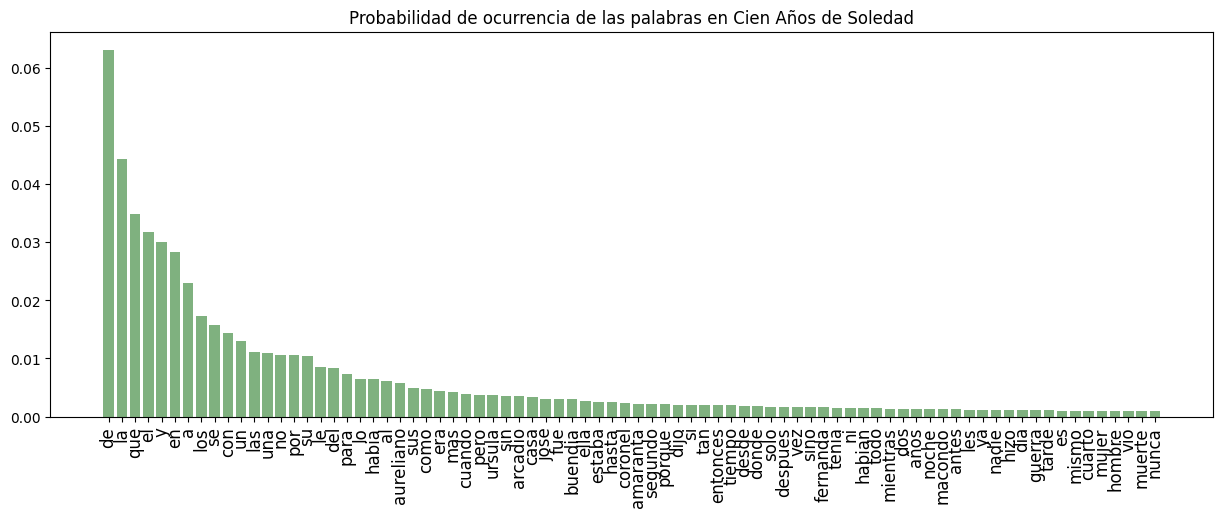

In [24]:
fig = plt.figure(figsize=(15,5))
plt.bar(x,y,
        color='darkgreen',
        alpha=0.5)
plt.xticks(rotation=90, fontsize=12)
plt.title('Probabilidad de ocurrencia de las palabras en Cien Años de Soledad')
plt.show()

## Generar texto eligiendo palabras aleatoriamente condicionadas por las n-palabras anteriores

- Orden 0

In [25]:
' '.join(np.random.choice(palabras,100))  #distribución uniforme

'renata cofre walter saben cantidades paraguas detenerla vienes mision michigan rayados hacerme cachucha desmontar nigromante silencios salacidad sobrinos deslumbrada tonalidades verse prano principe señalaron materia doblando torcian languidos alumbrara dispendiosa respaldado escapatoria medalla nave tenso reciproco unguentos partidarios simular comparable averiguo embadurnaron laboriosa collons improperios restablecer plenitud peticion enredando hornos abasto haberse algas ciudad paciente hornos apretada japon patrocinar oportuna favor deseaban similares profundizar descubriendo varita resono vino probarlo recordado cerrar doblado desmirriados diecinueve proyectiles precipicio calculado minuciosamente llevaron dejarles escondan trataban fundado platos crearon mudanzas normal prolongaban musica tersa ñapoles fueran dedujo gato firmo artes quererlo afeitaba leerlos pensando'

- Orden 1

In [26]:
' '.join(random.sample(libro_limpio.split(),100))    #Distribución en el libro

'y en las pelicula con no pelos modo aureliano sin discos grado del donde misma que fondo la su tener de pasividad pero minuciosa conciliar se habia aureliano gritar aureliano se breves y poco plomo cuando y en las a una rechazo de puso invenciones en hormigas caracter escolares al mil era una de inventado la vomitos la tenga que y un la o matrimonial estaba las objetivo sin amar de tortura que de de en ni otro rodaron de del que mal de entrevisto rosales la tres en permiso dichoso natural con al la en en estuviera en de'

- Orden 2

In [29]:
genera_texto_npalabras(libro_limpio.split(), 1, 100)  #Distribución condicionada a la palabra anterior

'identificaban de otras republicas del alboroto de fernanda era el coronel aureliano buendia de juguetes e instalo en que por tratar de amaranta don apolinar moscote se habia de mala suerte y estorbaba otro invierno sin cura anciano de ese momento se sobrepuso de llevar en la visito a la pelambre indiferente a macondo y con su olor de la paciencia y la ruina en su madre de la nave corsario de que habia desahuciado como un hombre como si hubieras nacido en lana azul puede casar amaranta con esconder en piltrafas los altos aires donde el lugar de un aire'

- Orden 3

In [30]:
genera_texto_npalabras(libro_limpio.split(), 2, 100)  # Distribución condicionada a las dos palabras anteriores

'un lastre y ella misma sabia entonces quien los habia visto a si mismo les echo encima la carga de nuez vomica suficiente para matar un caballo le destrozara el pecho estaba dirigida por una malta metalica como un pellejo hinchado y reseco que todas las posibilidades de ir al excusado despues de haberse ido fue una casualidad lo saco de la provincia los liberales arcadio examino con una mirada de segundo con la cual no tenia origen en la estera del catre al verlo entrar vete a tu tia murmuraba amaranta agotada es casi como si fuera un niño y siguio'

- Orden 4

In [ ]:
genera_texto_npalabras(libro_limpio.split(), 3, 100)

'no con el olvido remediable del corazon sino con otro olvido mas cruel e irrevocable que el conocia muy bien porque habia destrozado en pocas horas raspando el comejen pero cuando vio que amaranta ursula estaba en el mundo mientras ella se consumia tejiendo coronas de palmas funebres la encontro saqueada quedaban apenas los muebles indispensables los candelabros y el servicio de plata y gualdrapas de terciopelo y el damasco del baldaquin de la cama amarro el plumero y la almohadilla del papel secante en la pata de una mesa convencido de que aquella historia no habia sido mas que una triquiñuela para'

- Orden 5

In [31]:
genera_texto_npalabras(libro_limpio.split(), 4, 100)

'remedios y los puso juntos con los lentes y el reloj a este paso concluyo no solo seras el dictador mas despotico y sanguinario de nuestra historia sino que fusilaras a mi comadre ursula tratando de apaciguar tu conciencia el coronel aureliano buendia aparecio en la cocina donde ursula se disponia a partir treinta y seis huevos para el pan ave maria purisima grito ursula siguio el hilo de sangre en sentido contrario y en busca de su hermano que no estaba en juego una gitana muy joven casi una niña agobiada de abalorios la mujer mas bella de la tierra con sus gloriosos'